# Blockbuster BluePrint for Microsoft's Movie Mastery

## Introduction
Microsoft, the tech giant that’s mastered software and gaming, now wants to sprinkle some Hollywood magic into its portfolio by creating a movie studio. But here’s the plot twist—they have no clue about making movies. So, they’ve called on data wizards to decode the box office formula. 

Our mission? To dig into genres, budgets, and trends, and uncover the secret sauce behind blockbuster hits. With these insights, Microsoft can confidently dive into the glitzy world of cinema, aiming to produce films that not only dazzle audiences but also rake in the big bucks. Lights, camera, action!

## Business Understanding

Microsoft aims to enter the movie industry by launching a new studio but lacks filmmaking experience. 

This project will provide crucial data-driven insights to guide strategic decisions. 

Key stakeholders include Microsoft executives, the new studio head, and the data analysis team. Marketing teams, investors, and creative teams also affected. 

The insights derived from this project will directly influence the types of films the new studio produces, impacting production and marketing strategies. 

We will offer actionable recommendations to optimize financial investments and maximize box office success. 

These findings will enable Microsoft to make informed, strategic decisions, positioning the new studio for competitive success in the film industry.

## Data Understanding
We will be using data from the following sources:

1. IMDB Local Database

    IMDB (Internet Movie Database) is one of the most comprehensive and widely used online databases for movies, TV shows, and other entertainment content.

2. **Rotten Tomatoes Reviews** (rt.reviews.tsv.gz)

    This is a popular movie review aggregation website, offering a comprehensive view of critical reception of films and TV shows.

3. **Rotten Tomatoes Movie Info** (rt.movie_info.tsv.gz)

    Contains detailed movie information such as title, genre, director, cast, runtime, rating and studio producing the movie.

4. **The Numbers Movie Budgets** (tn.movie_budgets.csv.gz)

    The Numbers is an online movie database that specializes in providing comprehensive financial information about films, focusing on production budgets and financial performance.

5. **TMDb Movies** (tmdb.movies.csv.gz)

    Contains more information about movies from a popular online database for movies: The Movie Database.

## Reading the data

Now let us load our data, inspect it and see what we are dealing with.

But first, we import our python modules.

In [1]:
# Importing important python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

The data drom IMDB is in a local database `im.db`. 

Here is its Entity Relationship Diagram

![Entity Relationship Diagram.](./movie_data_erd.jpeg)

In [2]:
# Connecting to our im.db database
conn = sqlite3.connect('data/im.db')

In [3]:
# Extracting information from the database using SQL.
query = """
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.original_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes,
    p.primary_name AS director_name
FROM 
    movie_basics mb
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
LEFT JOIN 
    directors d ON mb.movie_id = d.movie_id
LEFT JOIN 
    persons p ON d.person_id = p.person_id;
"""

# loading the data into a pandas dataframe
imdb_data = pd.read_sql(query, conn)

# closing the connection
conn.close()

# display the first five rows of our resulting dataframe
imdb_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,Mani Kaul


The dataset contains information about movies, including their performance in terms of ratings and number of votes. Here's an overview of the columns:

1. movie_id: Unique identifier for each movie (e.g., "tt0063540")
2. primary_title: Main title of the movie (e.g., "Sunghursh")
3. original_title: Original title of the movie (e.g., "Sunghursh")
4. start_year: Year the movie was released or started (e.g., 2013)
5. runtime_minutes: Duration of the movie in minutes (e.g., 175.0)
6. genres: Genres of the movie (e.g., "Action,Crime,Drama")
7. averagerating: Average rating of the movie (e.g., 7.0)
8. numvotes: Number of votes the movie received (e.g., 77)
9. director_name: Name of the director (e.g., "Harnam Singh Rawail")

This dataset is useful in that we can analyze the following:
1. Distribution of movie ratings and votes.
2. Trends in movie releases over the years.
3. Analysis of genres and their popularity.
4. Correlation between runtime, ratings, and votes.
5. Performance of directors based on ratings and number of votes.

Now let us take a look at the data from the provided files

In [4]:
# Using pandas to view the first few entries from 'rt.reviews.tsv.gz'
rotten_tomatoes_reviews = pd.read_csv('./data/rt.reviews.tsv.gz', delimiter='\t', encoding='ISO-8859-1')
rotten_tomatoes_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Overview of columns:
1. id: Unique identifier for each movie
2. review: Review text
3. rating: Rating given by the reviewer (e.g., "3/5")
4. fresh: Freshness rating (e.g., "fresh", "rotten")
5. critic: Name of the critic
6. top_critic: Indicator if the critic is a top critic (0 or 1)
7. publisher: Publisher of the review
8. date: Date of the review

In [5]:
# Viewing the data from movie_info.tsv.gz
rotten_tomatoes_movie_info = pd.read_csv('./data/rt.movie_info.tsv.gz', delimiter='\t')
rotten_tomatoes_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Overview of columns:
1. id: Unique identifier for each movie
2. synopsis: Summary of the movie
3. rating: Movie rating (e.g., "R")
4. genre: Movie genres (e.g., "Action and Adventure|Classics|Drama")
5. director: Director of the movie
6. writer: Writer(s) of the movie
7. theater_date: Theatrical release date
8. dvd_date: DVD release date
9. currency: Currency for box office earnings
10. box_office: Box office earnings
11. runtime: Duration of the movie (e.g., "104 minutes")
12. studio: Studio that produced the movie

In [6]:
# Viewing data from tn.movie_budgets.csv.gz
the_numbers_movie_budgets = pd.read_csv('./data/tn.movie_budgets.csv.gz')
the_numbers_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Overview of columns:
1. id: Unique identifier for each movie.
2. release_date: Release date of the movie.
3. movie: Title of the movie.
4. production_budget: Production budget of the movie.
5. domestic_gross: Domestic gross earnings.
6. worldwide_gross: Worldwide gross earnings.

In [7]:
# Viewing data from tmdb.movies.csv.gz
the_movies_database = pd.read_csv('./data/tmdb.movies.csv.gz')
the_movies_database.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Overview of columns:
1. genre_ids: List of genre IDs for the movie.
2. id: Unique identifier for each movie.
3. original_language: Original language of the movie.
4. original_title: Original title of the movie.
5. popularity: Popularity score of the movie.
6. release_date: Release date of the movie.
7. title: Title of the movie.
8. vote_average: Average vote rating.
9. vote_count: Number of votes received.


## Data Preparation
Here, we will clean our datasets in a step by step fashion, to get it ready for useful analysis.

We will identify and get rid of duplicates, deal with missing data, do some type conversions and string standardization. 

Our aim is to merge the different datasets into one comprehensive dataset.
### 1. imdb_data

In [8]:
# Reminding ourselves how the data looks like.
imdb_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,Harnam Singh Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,Mani Kaul


We can see that we have duplicate entries.

In [9]:
# Dropping duplicates
imdb_data = imdb_data.drop_duplicates()

Next, we should deal with missing data. 

Let's see how many missing values we have, and in which columns.

In [10]:
# Looking at a summary of column information
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169024 entries, 0 to 296899
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         169024 non-null  object 
 1   primary_title    169024 non-null  object 
 2   original_title   169002 non-null  object 
 3   start_year       169024 non-null  int64  
 4   runtime_minutes  133103 non-null  float64
 5   genres           163054 non-null  object 
 6   averagerating    86703 non-null   float64
 7   numvotes         86703 non-null   float64
 8   director_name    163295 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 12.9+ MB


In [11]:
# Checking the total number of missing values in our columns
imdb_data.isnull().sum()

movie_id               0
primary_title          0
original_title        22
start_year             0
runtime_minutes    35921
genres              5970
averagerating      82321
numvotes           82321
director_name       5729
dtype: int64

In [12]:
# calculating the percentage of missing values in each column
imdb_data.isnull().sum()/imdb_data.shape[0]*100

movie_id            0.000000
primary_title       0.000000
original_title      0.013016
start_year          0.000000
runtime_minutes    21.252012
genres              3.532043
averagerating      48.703734
numvotes           48.703734
director_name       3.389459
dtype: float64

We have 48.7% of our rows missing the averagerating and numvotes values

But we need the average rating for our analysis, so we cannot simply drop that column.

However, the columns 'movie_id', 'primary_title', and 'numvotes' are not needed for our analysis.

In [13]:
# Dropping the specified columns
imdb_data = imdb_data.drop(['numvotes', 'primary_title', 'movie_id'], axis=1)

Next we can impute missing runtime_minutes values with the median. This will avoid messing with their distribution.

In [14]:
# Filling in missing 'runtime_minutes' with the median
imdb_data['runtime_minutes'] = imdb_data['runtime_minutes'].fillna(imdb_data['runtime_minutes'].median())

Finally, we can drop the rows containing the remaining missing values.

In [15]:
# Dropping rows with remaining missing values
imdb_data = imdb_data.dropna()

Now, lets have a look to confirm that we have no missing values

In [16]:
# Checking for missing values
imdb_data.isnull().sum()

original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
director_name      0
dtype: int64

In [17]:
# Looking at the last 5 rows
imdb_data.tail()

,original_title,start_year,runtime_minutes,genres,averagerating,director_name
296846,Swarm Season,2019,86.0,Documentary,6.2,Sarah Christman
296847,Diabolik sono io,2019,75.0,Documentary,6.2,Giancarlo Soldi
296858,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,Ahmet Faik Akinci
296863,Albatross,2017,86.0,Documentary,8.5,Chris Jordan
296881,Drømmeland,2019,72.0,Documentary,6.5,Joost van der Wiel


Next, we can split genres into a list to get it ready for analysis.

In [18]:
# Splitting the 'genres' column by comma, turning them into a list.
imdb_data['genres'] = imdb_data['genres'].str.split(',')

Next we can standardize the original_title column in preparation for merging it with the rest of the datasets based on movie titles.

Strategies:

1. convert to lower case to ensure case insensitivity

2. removing punctuation and special characters
    
3. removing any leasing or trailing whitespace

In [19]:
# Imprting the re module, which supports regular expressions
import re

# Function to standardize titles
def standardize_title(title):
    # Convert to lowercase
    title = title.lower()
    # Remove punctuation
    title = re.sub(r'[^\w\s]', '', title)
    # Trim whitespace
    title = title.strip()
    return title

In [20]:
# applying the function to the original_title column
imdb_data['standardized_title'] = imdb_data['original_title'].apply(standardize_title)

# dropping the original_title column
imdb_data.drop(columns=['original_title'], inplace=True)

In [21]:
# Final look at our dataset
imdb_data.tail()

,start_year,runtime_minutes,genres,averagerating,director_name,standardized_title
296846,2019,86.0,[Documentary],6.2,Sarah Christman,swarm season
296847,2019,75.0,[Documentary],6.2,Giancarlo Soldi,diabolik sono io
296858,2019,98.0,"[Drama, Family]",8.7,Ahmet Faik Akinci,sokagin çocuklari
296863,2017,86.0,[Documentary],8.5,Chris Jordan,albatross
296881,2019,72.0,[Documentary],6.5,Joost van der Wiel,drømmeland


### Rotten tomatoes data
Now lets move on to the rotten tomatoes movie info data

In [22]:
# View the first five rows
rotten_tomatoes_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Lets get rid of duplicates

In [23]:
# Dropping duplicates
rotten_tomatoes_movie_info = rotten_tomatoes_movie_info.drop_duplicates()

# Looking at a summary of our columns
rotten_tomatoes_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Next, let us look at the missing values.

In [24]:
# Total of missing values per column
rotten_tomatoes_movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [25]:
# Percentage of missing values per column
rotten_tomatoes_movie_info.isnull().sum()/rotten_tomatoes_movie_info.shape[0]*100

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

We can see that the column box office, which contains the amount brought in by the movie is a very useful column in our analysis, yet 78% of its values are missing.

Also, since this dataset has no movie names, and that the unique movie ids do not relate to any other columns in our datasets, we will not be able to merge this data set with the rest of our data.

We can therefore decide to keep the box office column, despite the large percentage of missing data.

This dataset will therefore be used separately from the rest of the data we have for visualizations to corroborate findings from the merged dataset.

Now let us get rid of columns we do not need.

In [26]:
# Dropping specified columns
rotten_tomatoes_movie_info.drop(['synopsis', 'dvd_date', 'currency', 'studio'], axis=1, inplace=True)

Next we can get rid of the rows with missing values since we cannot impute them.

In [27]:
# Dropping rows with missing values
rotten_tomatoes_movie_info.dropna(inplace=True)

# Looking at the last 5 rows
rotten_tomatoes_movie_info.tail()

,id,rating,genre,director,writer,theater_date,box_office,runtime
1536,1975,NR,Drama|Romance,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap,"Jul 3, 2013","581,813",142 minutes
1537,1976,NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","1,320,005",123 minutes
1541,1980,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","25,335,935",119 minutes
1542,1981,NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","1,416,189",129 minutes
1545,1985,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","59,371",98 minutes


### Rotten Tomatoes reviews data

In [28]:
# Looking at the first 5 rows
rotten_tomatoes_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [29]:
# Summary of our column data
rotten_tomatoes_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


The id and the fresh column can be useful in our analysis.

But first, lets get rid of duplicates and columns we do not need.

In [30]:
# Dropping duplicates
rotten_tomatoes_reviews.drop_duplicates(inplace=True)

In [31]:
# Selecting the 'id' and 'fresh' column
rotten_tomatoes_reviews = rotten_tomatoes_reviews[['id', 'fresh']]
rotten_tomatoes_reviews.tail()

,id,fresh
54427,2000,fresh
54428,2000,rotten
54429,2000,rotten
54430,2000,rotten
54431,2000,fresh


We can group the data by id, then get a summary of its freshness, and then combine the resulting data with the rotten tomatoes movie info data.

In [32]:
# converting 'fresh' column to numerical values where "fresh" is 1 and 'rotten' is 0.
rotten_tomatoes_reviews['fresh'] = rotten_tomatoes_reviews['fresh'].apply(lambda x: 1 if x == 'fresh' else 0)

In [33]:
# grouping our data by id and calculating the mean frehness rounded off to the nearest ones
rotten_tomatoes_reviews = rotten_tomatoes_reviews.groupby('id')['fresh'].mean().round(0).astype(int)
rotten_tomatoes_reviews.tail()

id
1996    1
1997    0
1998    1
1999    1
2000    0
Name: fresh, dtype: int64

now we can combine the rotten tomatoes movie info dataset with the freshness review 

In [34]:
# merging the two data frames using an inner join
combined_rotten_tomatoes = pd.merge(rotten_tomatoes_movie_info, rotten_tomatoes_reviews, on='id', how='inner')
combined_rotten_tomatoes.head()

,id,rating,genre,director,writer,theater_date,box_office,runtime,fresh
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",108 minutes,1
1,10,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","41,032,915",82 minutes,0
2,13,R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","224,114",123 minutes,1
3,14,R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","134,904",117 minutes,0
4,25,PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","20,518,224",127 minutes,0


In [35]:
# Summary of columns in our combined dataset
combined_rotten_tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            230 non-null    int64 
 1   rating        230 non-null    object
 2   genre         230 non-null    object
 3   director      230 non-null    object
 4   writer        230 non-null    object
 5   theater_date  230 non-null    object
 6   box_office    230 non-null    object
 7   runtime       230 non-null    object
 8   fresh         230 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 16.3+ KB


Next we can do some important type conversions for the genre column, converting the genres into a list of relevant genres, converting box_office to numeric data type, runtime to numeric data type, theatre date to date time

In [36]:
# Converting the genre column into a list of genres for each movie
combined_rotten_tomatoes['genre'] = combined_rotten_tomatoes['genre'].str.split('|')

In [37]:
# Converting the writer column into a list of writers for each movie
combined_rotten_tomatoes['writer'] = combined_rotten_tomatoes['writer'].str.split('|')

In [38]:
# Converting box_office to numeric
combined_rotten_tomatoes['box_office'] = combined_rotten_tomatoes['box_office'].replace('[\$,]', '', regex=True).astype(float)

In [39]:
# Converting runtime to numeric by removing ' minutes' and converting to int
combined_rotten_tomatoes['runtime'] = combined_rotten_tomatoes['runtime'].str.replace(' minutes', '').astype(int)

In [40]:
# Converting theater_date to datetime
combined_rotten_tomatoes['theater_date'] = pd.to_datetime(combined_rotten_tomatoes['theater_date'], format='%b %d, %Y')

In [41]:
# Final look at the last 5 rows of our dataset
combined_rotten_tomatoes.tail()

,id,rating,genre,director,writer,theater_date,box_office,runtime,fresh
225,1968,PG,"[Comedy, Drama]",Cameron Crowe,"[Aline Brosh McKenna, Cameron Crowe]",2011-12-23,72700000.0,126,1
226,1975,NR,"[Drama, Romance]",Vikramaditya Motwane,"[Vikramaditya Motwane, Bhavani Iyer, Anurag Ka...",2013-07-03,581813.0,142,1
227,1976,NR,"[Action and Adventure, Art House and Internati...",Ciro Guerra,"[Ciro Guerra, Jacques Toulemonde Vidal]",2016-02-17,1320005.0,123,1
228,1980,PG-13,"[Action and Adventure, Science Fiction and Fan...",Joss Whedon,[Joss Whedon],2005-09-30,25335935.0,119,1
229,1981,NR,"[Comedy, Drama]",Gauri Shinde,[Gauri Shinde],2012-10-05,1416189.0,129,1


### The Numbers Movie Budgets
Now let us move to the next dataset from The Numbers

In [42]:
# Summary of columns
the_numbers_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [43]:
# First 5 rows
the_numbers_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [44]:
# Sum of missing values per column
the_numbers_movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We have 5782 entries, with no missing values. Lets first get rid of duplicates.

In [45]:
# dropping duplicates
the_numbers_movie_budgets.drop_duplicates(inplace=True)

Now let us do some type conversions and standardize the movie column.

In [46]:
# converting release_date to datetime
the_numbers_movie_budgets['release_date'] = pd.to_datetime(the_numbers_movie_budgets['release_date'], format='%b %d, %Y')

In [47]:
# standardizing the title in the movie column using the function we created earlier
the_numbers_movie_budgets['standardized_title'] = the_numbers_movie_budgets['movie'].apply(standardize_title)

In [48]:
# convert production_budget, domestic_gross, and worldwide_gross to float data type
the_numbers_movie_budgets['production_budget'] = the_numbers_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
the_numbers_movie_budgets['domestic_gross'] = the_numbers_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
the_numbers_movie_budgets['worldwide_gross'] = the_numbers_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

Since we have both the budget and the worldwide gross, we can create a new column containing the calculated profits.

In [49]:
# creating a new column 'profit'
the_numbers_movie_budgets['profit'] = the_numbers_movie_budgets['worldwide_gross'] - the_numbers_movie_budgets['production_budget']
the_numbers_movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,standardized_title,profit
5777,78,2018-12-31,Red 11,7000.0,0.0,0.0,red 11,-7000.0
5778,79,1999-04-02,Following,6000.0,48482.0,240495.0,following,234495.0
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1338.0,return to the land of wonders,-3662.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.0,a plague so pleasant,-1400.0
5781,82,2005-08-05,My Date With Drew,1100.0,181041.0,181041.0,my date with drew,179941.0


### The Movies Database

Moving on to the movies database data.

In [50]:
# summary of columns
the_movies_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [51]:
# first 5 rows
the_movies_database.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [52]:
# total of missing values per column
the_movies_database.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Here, we have 26517 entries, with no missing values.
We can go ahead and get rid of duplicates, if present.

In [53]:
# dropping duplicates
the_movies_database.drop_duplicates(inplace=True)

It is also important to note that the genre_ids column does not have actual genres, but instead a coded list of genres. A simple google search led to the key below:![genre id key](genre_ids.png)

Now let us replace the genre ids with actual genres

In [54]:
# a dictionary containing the genres
genre_key = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# function to remap the genres 
def remap_genres(genre_ids):
    genres = [genre_key.get(int(genre_id), 'Unknown') for genre_id in eval(genre_ids)]
    return genres

# applying the function to our database
the_movies_database['genres'] = the_movies_database['genre_ids'].apply(remap_genres)

# show the first 5 rows
the_movies_database.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


Next, we can get rid of columns we do not need.

In [55]:
# dropping selected columns
the_movies_database.drop(['Unnamed: 0','genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'vote_count'], axis=1, inplace=True)

In [56]:
# show the last 5 rows
the_movies_database.tail()

,release_date,title,vote_average,genres
26512,2018-10-13,Laboratory Conditions,0.0,"[Horror, Drama]"
26513,2018-05-01,_EXHIBIT_84xxx_,0.0,"[Drama, Thriller]"
26514,2018-10-01,The Last One,0.0,"[Fantasy, Action, Adventure]"
26515,2018-06-22,Trailer Made,0.0,"[Family, Adventure, Action]"
26516,2018-10-05,The Church,0.0,"[Thriller, Horror]"


We can see that some of the rows have movies with a vote average of 0.0. Lets find out how many they are and het rid of them.

In [57]:
# Count the number of rows with a vote average of 0.0
rows_with_zero_vote_average = the_movies_database[the_movies_database['vote_average'] == 0.0].shape[0]
rows_with_zero_vote_average

136

In [58]:
# Removing rows with a vote average of 0.0
the_movies_database = the_movies_database[the_movies_database['vote_average'] != 0.0]

Next we can do some type conversions and standardize the title column

In [59]:
# Convert release_date to datetime
the_movies_database.loc[:, 'release_date'] = pd.to_datetime(the_movies_database['release_date'], format='%Y-%m-%d')

In [60]:
# standardizing movie titles in the title column
the_movies_database.loc[:, 'standardized_title'] = the_movies_database['title'].apply(standardize_title)

In [61]:
# showing the last 5 rows
the_movies_database.tail()

,release_date,title,vote_average,genres,standardized_title
26500,2018-02-04 00:00:00,Two,1.0,[],two
26501,2018-10-18 00:00:00,President Evil,1.0,[Horror],president evil
26502,2018-10-01 00:00:00,Vicktey Vitch (It's Halloween Poem),1.0,[Animation],vicktey vitch its halloween poem
26503,2018-06-12 00:00:00,Evolution 4K,1.0,[Documentary],evolution 4k
26504,2015-03-28 00:00:00,Head,1.0,"[Horror, Comedy, Horror]",head


### Merging our datasets

Lets start by merging our imdb_data with the_movies_database. Lets use inner join to retain only movies present in both datasets.

In [62]:
# merging the imdb_data with the_movies_database
merged_1 = pd.merge(imdb_data, the_movies_database, on='standardized_title', how='inner')

Next we merge the resulting dataset with the_numbers_movie_budgets

In [63]:
# merging the resulting data set with the_numbers_movie_budgets
final_merged = pd.merge(merged_1, the_numbers_movie_budgets, on='standardized_title', how='inner')
final_merged.tail()

,start_year,runtime_minutes,genres_x,averagerating,director_name,standardized_title,release_date_x,title,vote_average,genres_y,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,profit
0,2012,91.0,"[Action, Animation, Comedy]",1.9,Lawrence Kasanoff,foodfight,2013-05-07 00:00:00,Foodfight!,2.1,"[Animation, Action, Comedy, Family]",26,2012-12-31,Foodfight!,45000000.0,0.0,7.370600e+04,-4.492629e+07
1,2012,124.0,"[Adventure, Drama, Romance]",6.1,Walter Salles,on the road,2012-12-21 00:00:00,On the Road,5.6,"[Adventure, Drama]",17,2013-03-22,On the Road,25000000.0,720828.0,9.313302e+06,-1.568670e+07
2,2013,114.0,"[Adventure, Comedy, Drama]",7.3,Ben Stiller,the secret life of walter mitty,2013-12-25 00:00:00,The Secret Life of Walter Mitty,7.1,"[Adventure, Comedy, Drama, Fantasy]",37,2013-12-25,The Secret Life of Walter Mitty,91000000.0,58236838.0,1.878612e+08,9.686118e+07
3,2014,114.0,"[Action, Crime, Drama]",6.5,Scott Frank,a walk among the tombstones,2014-09-19 00:00:00,A Walk Among the Tombstones,6.3,"[Crime, Drama, Mystery, Thriller]",67,2014-09-19,A Walk Among the Tombstones,28000000.0,26017685.0,6.210859e+07,3.410859e+07
4,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,Colin Trevorrow,jurassic world,2015-06-12 00:00:00,Jurassic World,6.6,"[Action, Adventure, Science Fiction, Thriller]",34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,2019,90.0,[Comedy],6.4,Varante Soudjian,walter,2015-03-13 00:00:00,Walter,5.5,"[Drama, Comedy]",96,2015-03-13,Walter,700000.0,0.0,0.000000e+00,-7.000000e+05
3562,2019,86.0,"[Action, Drama]",4.7,Prachya Pinkaew,sisters,2015-12-18 00:00:00,Sisters,5.9,[Comedy],57,2015-12-18,Sisters,30000000.0,87044645.0,1.060307e+08,7.603066e+07
3563,2018,85.0,[Comedy],5.8,Hatef Alimardani,columbus,2017-08-04 00:00:00,Columbus,7.3,[Drama],93,2017-08-04,Columbus,700000.0,1017107.0,1.110511e+06,4.105110e+05
3564,2019,84.0,[Documentary],8.1,Nick Willing,unstoppable,2010-11-12 00:00:00,Unstoppable,6.4,"[Action, Thriller]",19,2010-11-12,Unstoppable,95000000.0,81562942.0,1.657209e+08,7.072092e+07


Now we can do some further cleaning on our resulting dataset

We have some duplicates having the same standardized_title. Let us remove them.

In [64]:
# dropping duplicates
cleaned_final_merged = final_merged.drop_duplicates(subset=['standardized_title'])

Next we can drop columns we do not need and consolidate columns with similar data.

In [65]:
# dropping specified columns
cleaned_final_merged.drop(['start_year', 'id', 'movie', 'release_date_y', 'genres_y', 'title'], axis=1, inplace=True)

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_41299/3629806793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_final_merged.drop(['start_year', 'id', 'movie', 'release_date_y', 'genres_y', 'title'], axis=1, inplace=True)


Next lets combine the two ratings into one column containing the average of each of the values.

In [66]:
# combining the ratings into a single average
cleaned_final_merged.loc[:,'average_rating'] = cleaned_final_merged[['averagerating', 'vote_average']].mean(axis=1)
cleaned_final_merged

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_41299/980686240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_final_merged.loc[:,'average_rating'] = cleaned_final_merged[['averagerating', 'vote_average']].mean(axis=1)


,runtime_minutes,genres_x,averagerating,director_name,standardized_title,release_date_x,vote_average,production_budget,domestic_gross,worldwide_gross,profit,average_rating
0,91.0,"[Action, Animation, Comedy]",1.9,Lawrence Kasanoff,foodfight,2013-05-07 00:00:00,2.1,45000000.0,0.0,7.370600e+04,-4.492629e+07,2.00
1,124.0,"[Adventure, Drama, Romance]",6.1,Walter Salles,on the road,2012-12-21 00:00:00,5.6,25000000.0,720828.0,9.313302e+06,-1.568670e+07,5.85
2,114.0,"[Adventure, Comedy, Drama]",7.3,Ben Stiller,the secret life of walter mitty,2013-12-25 00:00:00,7.1,91000000.0,58236838.0,1.878612e+08,9.686118e+07,7.20
3,114.0,"[Action, Crime, Drama]",6.5,Scott Frank,a walk among the tombstones,2014-09-19 00:00:00,6.3,28000000.0,26017685.0,6.210859e+07,3.410859e+07,6.40
4,124.0,"[Action, Adventure, Sci-Fi]",7.0,Colin Trevorrow,jurassic world,2015-06-12 00:00:00,6.6,215000000.0,652270625.0,1.648855e+09,1.433855e+09,6.80
...,...,...,...,...,...,...,...,...,...,...,...,...
3502,127.0,"[Drama, Horror, Mystery]",7.3,Ari Aster,hereditary,2018-06-08 00:00:00,7.0,10000000.0,44069456.0,7.013390e+07,6.013390e+07,7.15
3509,155.0,"[Action, Comedy, Crime]",7.4,Ahsan Rahim,teefa in trouble,2018-07-20 00:00:00,7.6,1500000.0,0.0,9.880600e+04,-1.401194e+06,7.50
3521,66.0,[Documentary],7.3,Yaser Talebi,beloved,2011-08-17 00:00:00,6.7,53000000.0,22852487.0,2.285249e+07,-3.014751e+07,7.00
3532,128.0,[Documentary],6.7,Michael Moore,fahrenheit 119,2018-09-10 00:00:00,7.1,5000000.0,6352306.0,6.653715e+06,1.653715e+06,6.90


In [67]:
# dropping averagerating and vote_average
cleaned_final_merged = cleaned_final_merged.drop(columns=['averagerating', 'vote_average'])

## Data Analysis and Visualizations

We will be using our merged dataset for most of our analysis.

To kickstart our analysis, we can have a look at the top 5 movies in each category to give us a picture of the kinds of movies we are dealing with.

In [68]:
# Define a function to get the top 5 movies for a specific column
def top_5_movies(column_name):
    return cleaned_final_merged[['standardized_title', column_name]].sort_values(by=column_name, ascending=False).head(5)

# Get the top 5 movies for each category
top_5_runtime = top_5_movies('runtime_minutes')
top_5_budget = top_5_movies('production_budget')
top_5_domestic_gross = top_5_movies('domestic_gross')
top_5_worldwide_gross = top_5_movies('worldwide_gross')
top_5_profit = top_5_movies('profit')
top_5_rating = top_5_movies('average_rating')

# Display the top 5 movies in each category
top_5_runtime, top_5_budget, top_5_domestic_gross, top_5_worldwide_gross, top_5_profit, top_5_rating

(                    standardized_title  runtime_minutes
 170            the wolf of wall street            180.0
 1678                  jab tak hai jaan            176.0
 557                        cloud atlas            172.0
 93                        interstellar            169.0
 128   the hobbit an unexpected journey            169.0,
                               standardized_title  production_budget
 469   pirates of the caribbean on stranger tides        410600000.0
 1993                      avengers age of ultron        330600000.0
 2891                       avengers infinity war        300000000.0
 1936                                     spectre        300000000.0
 156                               justice league        300000000.0,
          standardized_title  domestic_gross
 1300          black panther     700059566.0
 2891  avengers infinity war     678815482.0
 4            jurassic world     652270625.0
 106            the avengers     623279547.0
 2699          in

### Top 5 Movies in Each Category

#### Top 5 Movies by Runtime

| Rank | Movie                               | Runtime (minutes) |
|------|-------------------------------------|-------------------|
| 1    | The Wolf of Wall Street             | 180               |
| 2    | Jab Tak Hai Jaan                    | 176               |
| 3    | Cloud Atlas                         | 172               |
| 4    | Interstellar                        | 169               |
| 5    | The Hobbit: An Unexpected Journey   | 169               |

#### Top 5 Movies by Production Budget

| Rank | Movie                                     | Budget (millions) |
|------|-------------------------------------------|-------------------|
| 1    | Pirates of the Caribbean: On Stranger Tides | $410.6            |
| 2    | Avengers: Age of Ultron                   | $330.6            |
| 3    | Avengers: Infinity War                    | $300              |
| 4    | Spectre                                   | $300              |
| 5    | Justice League                            | $300              |

#### Top 5 Movies by Domestic Gross

| Rank | Movie                   | Domestic Gross (millions) |
|------|-------------------------|---------------------------|
| 1    | Black Panther           | $700                      |
| 2    | Avengers: Infinity War  | $678.8                    |
| 3    | Jurassic World          | $652.3                    |
| 4    | The Avengers            | $623.3                    |
| 5    | Incredibles 2           | $608.6                    |

#### Top 5 Movies by Worldwide Gross

| Rank | Movie                   | Worldwide Gross (billions) |
|------|-------------------------|----------------------------|
| 1    | Avengers: Infinity War  | $2.048                     |
| 2    | Jurassic World          | $1.649                     |
| 3    | The Avengers            | $1.518                     |
| 4    | Avengers: Age of Ultron | $1.403                     |
| 5    | Black Panther           | $1.348                     |

#### Top 5 Movies by Profit

| Rank | Movie                             | Profit (billions)  |
|------|-----------------------------------|--------------------|
| 1    | Avengers: Infinity War            | $1.748             |
| 2    | Jurassic World                    | $1.434             |
| 3    | The Avengers                      | $1.293             |
| 4    | Black Panther                     | $1.148             |
| 5    | Jurassic World: Fallen Kingdom    | $1.136             |

#### Top 5 Movies by Average Rating

| Rank | Movie                             | Rating |
|------|-----------------------------------|--------|
| 1    | The Promise                       | 8.9    |
| 2    | Inception                         | 8.55   |
| 3    | Nerve                             | 8.4    |
| 4    | Avengers: Infinity War            | 8.4    |
| 5    | Interstellar                      | 8.4    |


### When were our movies released?

Next it would be interesting to see between which years our movies were released

In [ ]:
# Extract the release year from the release date column
cleaned_final_merged['release_year'] = pd.to_datetime(cleaned_final_merged['release_date_x']).dt.year

# Get the range of years
release_year_min = cleaned_final_merged['release_year'].min()
release_year_max = cleaned_final_merged['release_year'].max()

release_year_min, release_year_max

(1976, 2019)

The movies in our dataset were released between the years **1976** and **2019**. This range provides a broad timeline of movie releases, allowing for analysis of trends and patterns over several decades.

But importantly, our data is not up to date to 2024

### Univarriate Analysis.
First of all, we can use the .describe() function to give us summary statistics in tabular format then visualize the distribution of the data we have.

In [ ]:
# generating descriptive statistics
cleaned_final_merged.describe()

,index,runtime_minutes,production_budget,domestic_gross,worldwide_gross,profit,average_rating
count,1802.000000,1802.000000,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1802.000000
mean,1449.693119,104.844617,3.901323e+07,4.826568e+07,1.190460e+08,8.003276e+07,6.193285
std,976.381500,17.809631,5.178724e+07,7.786152e+07,2.125350e+08,1.741373e+08,0.995512
min,0.000000,41.000000,9.000000e+03,0.000000e+00,0.000000e+00,-1.104502e+08,2.000000
25%,610.250000,92.000000,5.000000e+06,1.109372e+06,3.595548e+06,-1.619462e+06,5.600000
50%,1301.500000,103.000000,2.000000e+07,2.081070e+07,3.813538e+07,1.385955e+07,6.250000
75%,2244.500000,115.000000,5.000000e+07,5.836839e+07,1.266729e+08,7.907472e+07,6.900000
max,3555.000000,180.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,8.900000


#### 1. Runtime 

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


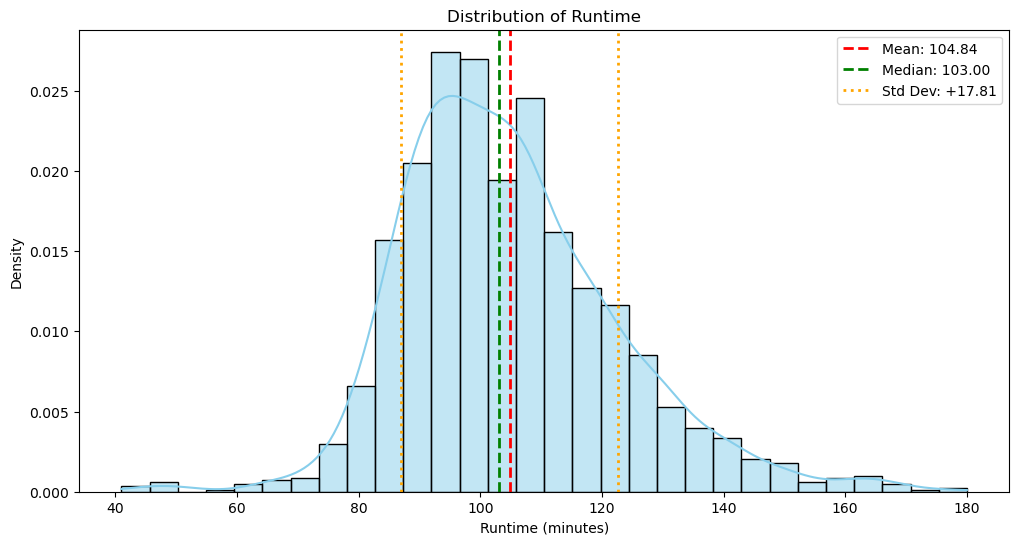

In [71]:
# Extract the runtime column
runtime_data = cleaned_final_merged['runtime_minutes'].dropna()

# Calculate the mean, median, and standard deviation
mean_runtime = runtime_data.mean()
median_runtime = runtime_data.median()
std_runtime = runtime_data.std()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of runtime
sns.histplot(runtime_data, kde=True, bins=30, color='skyblue', stat='density')

# Add lines for the mean, median, and standard deviation
plt.axvline(mean_runtime, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_runtime:.2f}')
plt.axvline(median_runtime, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_runtime:.2f}')
plt.axvline(mean_runtime + std_runtime, color='orange', linestyle='dotted', linewidth=2, label=f'Std Dev: +{std_runtime:.2f}')
plt.axvline(mean_runtime - std_runtime, color='orange', linestyle='dotted', linewidth=2)

# Add titles and labels
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

**Mean**: The average runtime of movies is approximately 104.8 minutes, indicating that most movies are around 1 hour and 45 minutes long.

**Standard Deviation**: The standard deviation is 17.8 minutes, showing moderate variability in movie lengths.

**Range**: The shortest movie is 41 minutes, and the longest is 180 minutes (3 hours), indicating a wide range of movie lengths.

**Median**: The median runtime is 103 minutes, close to the mean, suggesting a relatively symmetric distribution around the central value.

#### 2. Production Budget

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


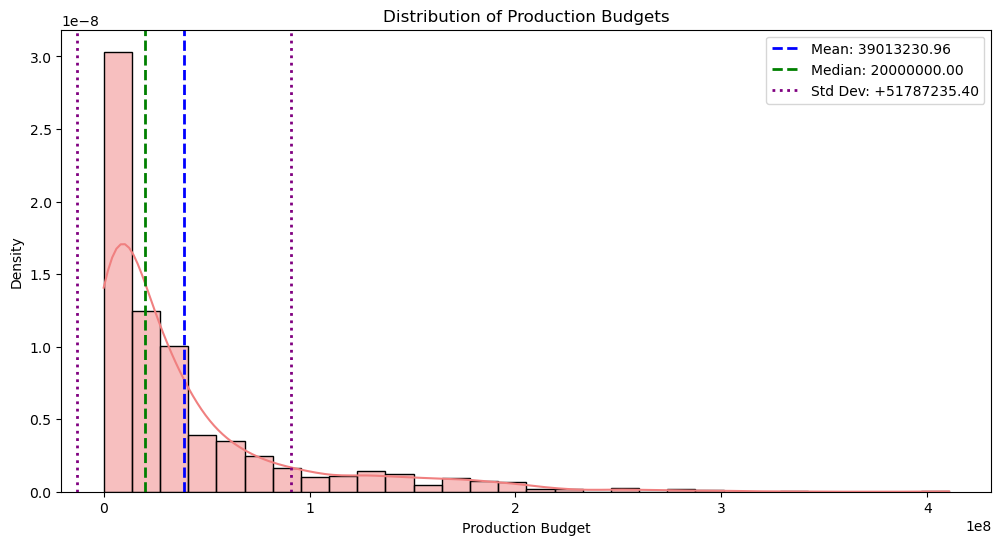

In [72]:
# Extract the production budget column
budget_data = cleaned_final_merged['production_budget'].dropna()

# Calculate the mean, median, and standard deviation
mean_budget = budget_data.mean()
median_budget = budget_data.median()
std_budget = budget_data.std()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of production budgets
sns.histplot(budget_data, kde=True, bins=30, color='lightcoral', stat='density')

# Add lines for the mean, median, and standard deviation
plt.axvline(mean_budget, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_budget:.2f}')
plt.axvline(median_budget, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_budget:.2f}')
plt.axvline(mean_budget + std_budget, color='purple', linestyle='dotted', linewidth=2, label=f'Std Dev: +{std_budget:.2f}')
plt.axvline(mean_budget - std_budget, color='purple', linestyle='dotted', linewidth=2)

# Add titles and labels
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

**Mean**: The average production budget is around $39 million.

**Standard Deviation**: The high standard deviation of $51.8 million indicates significant variability in movie budgets.

**Range**: The lowest budget is $9,000, and the highest is $410.6 million, showing a vast difference in production costs.

**Median**: The median budget is $20 million, indicating that half of the movies have budgets less than this amount, with some high-budget outliers skewing the mean.

#### 3. Domestic Gross:

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


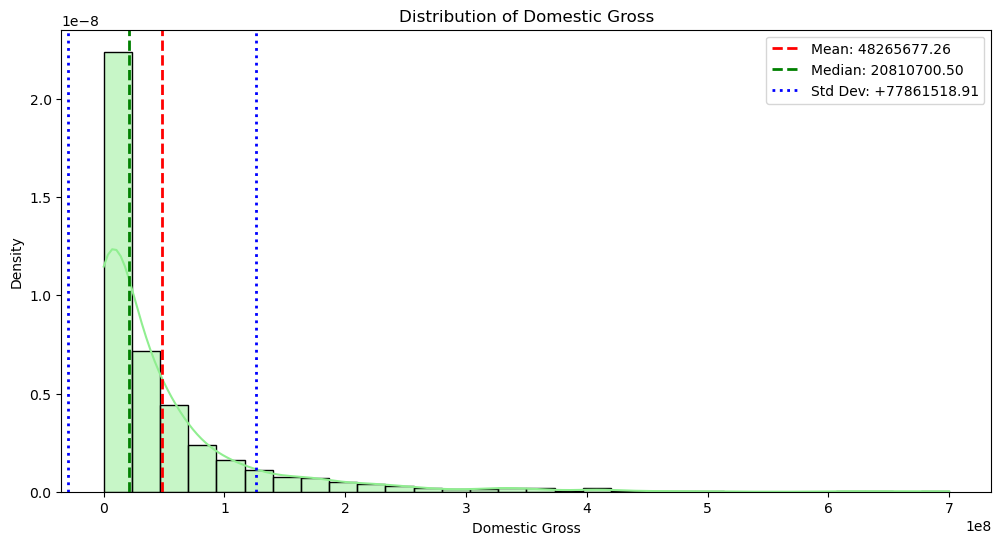

In [73]:
# Extract the domestic gross column
domestic_gross_data = cleaned_final_merged['domestic_gross'].dropna()

# Calculate the mean, median, and standard deviation
mean_domestic_gross = domestic_gross_data.mean()
median_domestic_gross = domestic_gross_data.median()
std_domestic_gross = domestic_gross_data.std()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of domestic gross
sns.histplot(domestic_gross_data, kde=True, bins=30, color='lightgreen', stat='density')

# Add lines for the mean, median, and standard deviation
plt.axvline(mean_domestic_gross, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_domestic_gross:.2f}')
plt.axvline(median_domestic_gross, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_domestic_gross:.2f}')
plt.axvline(mean_domestic_gross + std_domestic_gross, color='blue', linestyle='dotted', linewidth=2, label=f'Std Dev: +{std_domestic_gross:.2f}')
plt.axvline(mean_domestic_gross - std_domestic_gross, color='blue', linestyle='dotted', linewidth=2)

# Add titles and labels
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

**Mean**: The average domestic gross earnings are approximately $48.3 million.

**Standard Deviation:** The standard deviation is $77.9 million, showing substantial variability in domestic earnings.

**Range**: The minimum is $0, and the maximum is $700 million, indicating a wide range in domestic performance.

**Median**: The median domestic gross is $20.8 million, suggesting that many movies earn significantly less, with a few high earners increasing the mean.

#### 4. Worldwide Gross:


/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


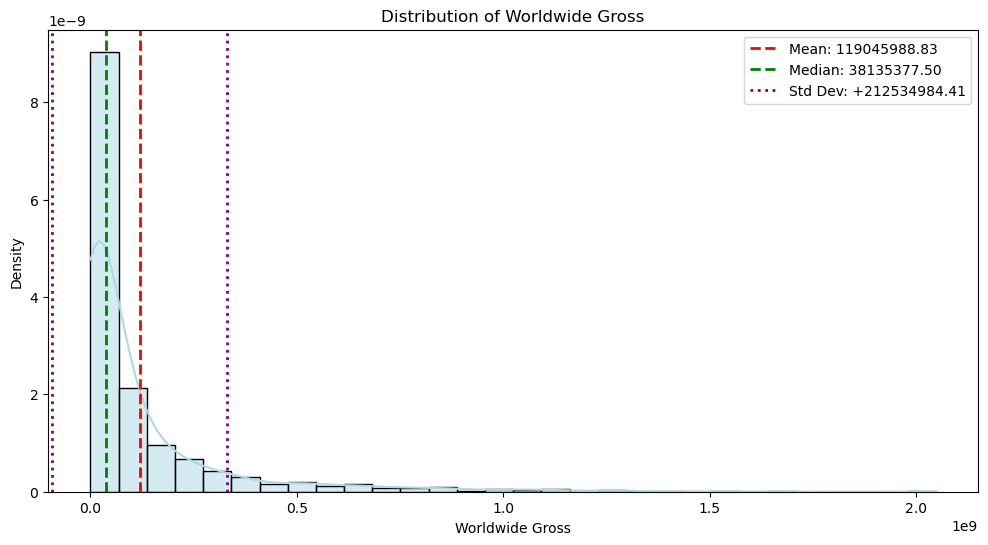

In [74]:
# Extract the worldwide gross column
worldwide_gross_data = cleaned_final_merged['worldwide_gross'].dropna()

# Calculate the mean, median, and standard deviation
mean_worldwide_gross = worldwide_gross_data.mean()
median_worldwide_gross = worldwide_gross_data.median()
std_worldwide_gross = worldwide_gross_data.std()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of worldwide gross
sns.histplot(worldwide_gross_data, kde=True, bins=30, color='lightblue', stat='density')

# Add lines for the mean, median, and standard deviation
plt.axvline(mean_worldwide_gross, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_worldwide_gross:.2f}')
plt.axvline(median_worldwide_gross, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_worldwide_gross:.2f}')
plt.axvline(mean_worldwide_gross + std_worldwide_gross, color='purple', linestyle='dotted', linewidth=2, label=f'Std Dev: +{std_worldwide_gross:.2f}')
plt.axvline(mean_worldwide_gross - std_worldwide_gross, color='purple', linestyle='dotted', linewidth=2)

# Add titles and labels
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

**Mean**: The average worldwide gross earnings are around $119 million.

**Standard Deviation**: The standard deviation is $212.5 million, indicating very high variability.

**Range**: The lowest is $0, and the highest is $2.048 billion, reflecting massive differences in global performance.

**Median**: The median worldwide gross is $38.1 million, showing that many movies earn less than the average, influenced by a few blockbuster hits.

#### 5. Profit:

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


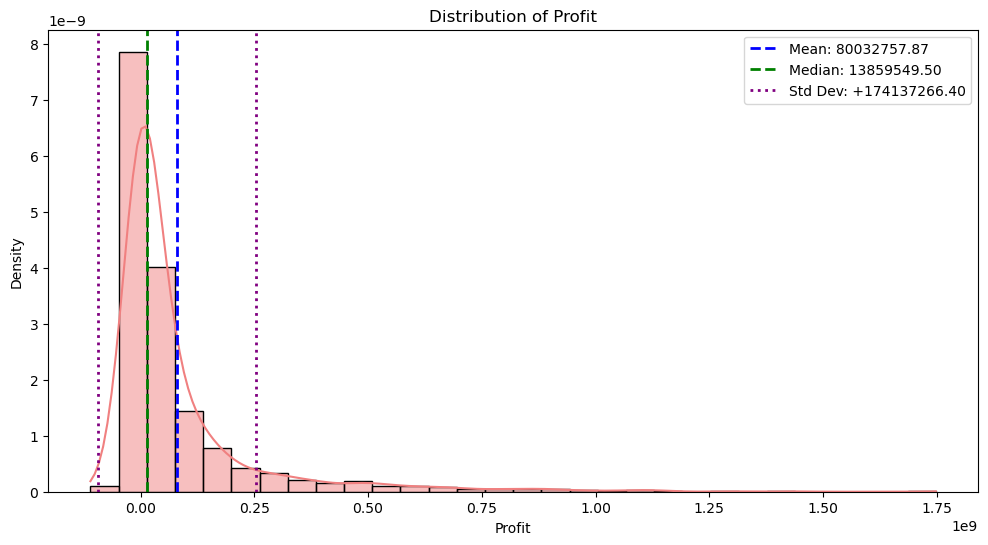

In [96]:
# Extract the profit column
profit_data = cleaned_final_merged['profit'].dropna()

# Calculate the mean, median, and standard deviation
mean_profit = profit_data.mean()
median_profit = profit_data.median()
std_profit = profit_data.std()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of profit
sns.histplot(profit_data, kde=True, bins=30, color='lightcoral', stat='density')

# Add lines for the mean, median, and standard deviation
plt.axvline(mean_profit, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_profit:.2f}')
plt.axvline(median_profit, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_profit:.2f}')
plt.axvline(mean_profit + std_profit, color='purple', linestyle='dotted', linewidth=2, label=f'Std Dev: +{std_profit:.2f}')
plt.axvline(mean_profit - std_profit, color='purple', linestyle='dotted', linewidth=2)

# Add titles and labels
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


**Mean**: The average profit is around $80 million.

**Standard Deviation**: The standard deviation is $174.1 million, highlighting high variability in profitability.

**Range**: The minimum profit is -$110.5 million (indicating losses), and the maximum is $1.748 billion, showing significant differences in financial outcomes.

**Median**: The median profit is $13.9 million, suggesting that many movies are not highly profitable, with a few highly profitable movies skewing the mean.

#### 6. Average Rating:

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


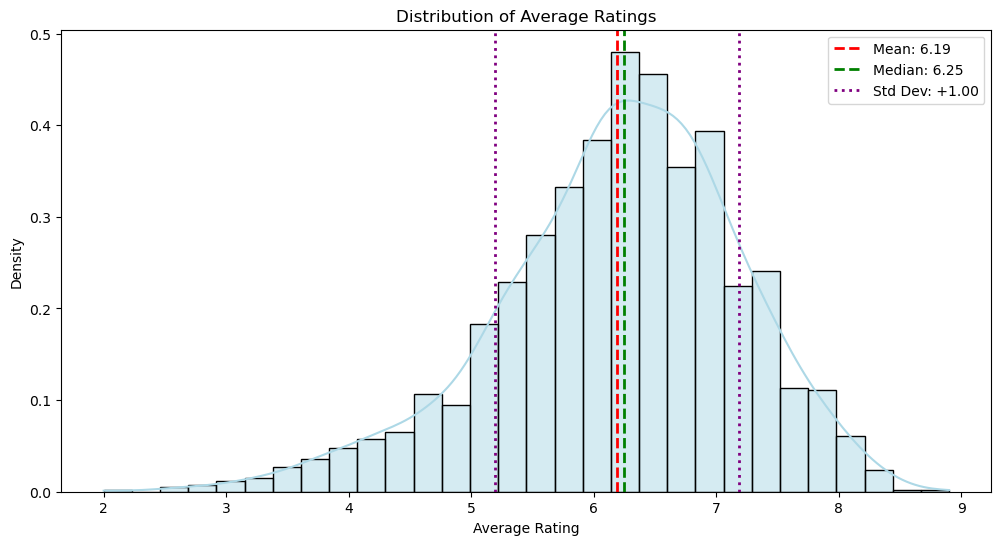

In [76]:
# Extract the average rating column
rating_data = cleaned_final_merged['average_rating']

# Calculate the mean, median, and standard deviation
mean_rating = rating_data.mean()
median_rating = rating_data.median()
std_rating = rating_data.std()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of average ratings
sns.histplot(rating_data, kde=True, bins=30, color='lightblue', stat='density')

# Add lines for the mean, median, and standard deviation
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_rating:.2f}')
plt.axvline(mean_rating + std_rating, color='purple', linestyle='dotted', linewidth=2, label=f'Std Dev: +{std_rating:.2f}')
plt.axvline(mean_rating - std_rating, color='purple', linestyle='dotted', linewidth=2)

# Add titles and labels
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

**Mean**: The average rating is approximately 6.19, indicating generally positive reception.

**Standard Deviation**: The standard deviation is 0.995, showing some variability in ratings.

**Range**: Ratings range from 2 to 8.9, indicating a wide spectrum of critical reception.
    
**Median**: The median rating is 6.25, very close to the mean, suggesting a fairly symmetric distribution around the central value.


### **Bivarriate analysis**

#### **1. Runtime vs Profits**
Do the runtime of movies affect its profitability?

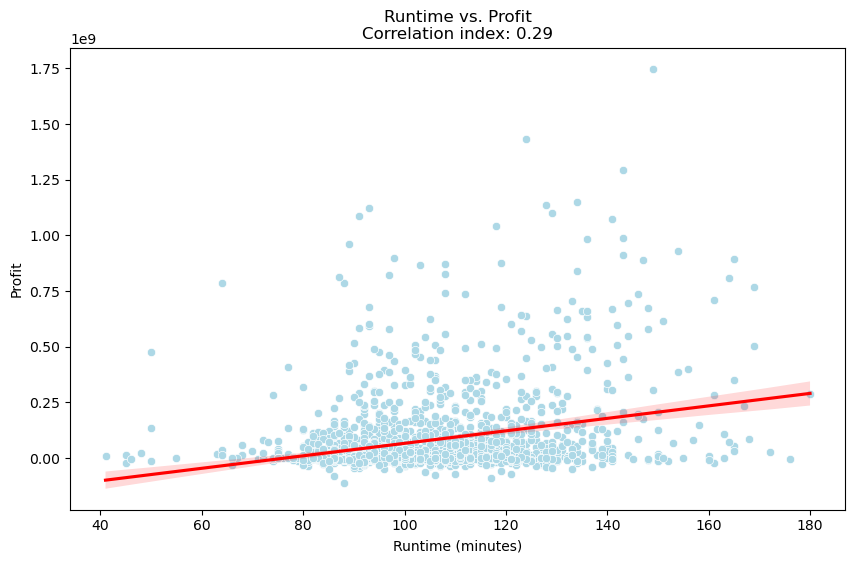

0.2865682519417809

In [94]:
# Calculate correlation between runtime and profit
correlation_runtime_profit = cleaned_final_merged['runtime_minutes'].corr(cleaned_final_merged['profit'])

# Scatter plot: Runtime vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='profit', data=cleaned_final_merged, color='lightblue')
sns.regplot(x='runtime_minutes', y='profit', data=cleaned_final_merged, scatter=False, color='red')
plt.title(f'Runtime vs. Profit\nCorrelation index: {correlation_runtime_profit:.2f}')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Profit')
plt.show()

correlation_runtime_profit

The correlation coefficient between runtime and profit is approximately **0.287**. This value suggests a weak to moderate positive relationship. While longer movies generally tend to be more profitable, other factors also play significant roles in determining profitability.

The positive correlation suggests that investing in longer movies might be beneficial. However, runtime alone is not a strong predictor of profit.

Consider Other Factors such as budget, genre, marketing, and release timing should also be considered when predicting a movie's profitability.

#### **2. Genres vs Profit**

Now lets dig deeper into our genres. Lets see how they relate to profits

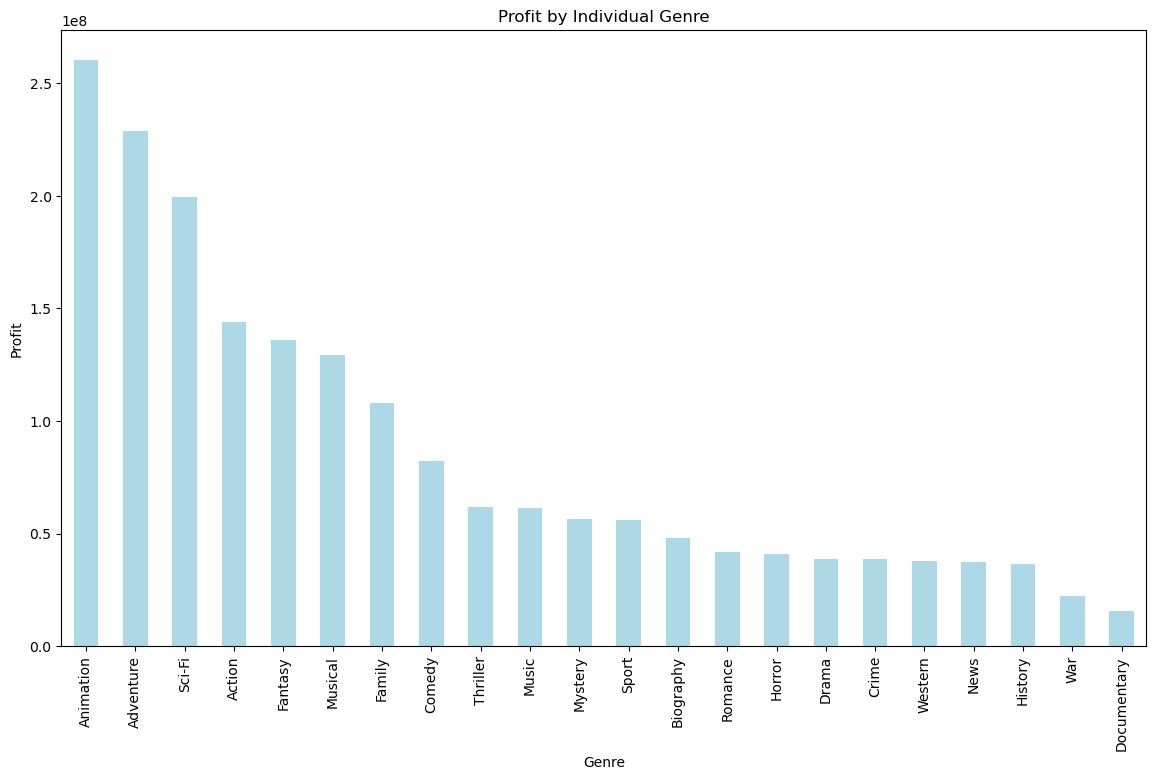

genres_x
Animation      2.605550e+08
Adventure      2.286141e+08
Sci-Fi         1.996309e+08
Action         1.440868e+08
Fantasy        1.361653e+08
Musical        1.293624e+08
Family         1.078326e+08
Comedy         8.232260e+07
Thriller       6.185734e+07
Music          6.145033e+07
Mystery        5.630733e+07
Sport          5.605265e+07
Biography      4.822737e+07
Romance        4.194759e+07
Horror         4.078407e+07
Drama          3.887415e+07
Crime          3.869960e+07
Western        3.770201e+07
News           3.729337e+07
History        3.640243e+07
War            2.240042e+07
Documentary    1.582320e+07
Name: profit, dtype: float64

In [109]:
# Explode the genres column to analyze individual genres
cleaned_final_merged_exploded_individual = cleaned_final_merged.explode('genres_x')
cleaned_final_merged_exploded_individual['genres_x'] = cleaned_final_merged_exploded_individual['genres_x'].str.strip("[]'").str.split(', ')

# Explode again to separate individual genres
cleaned_final_merged_exploded_individual = cleaned_final_merged_exploded_individual.explode('genres_x')

# Clean up the genre names to avoid duplication
cleaned_final_merged_exploded_individual['genres_x'] = cleaned_final_merged_exploded_individual['genres_x'].str.replace("'", "").str.strip()

# Calculate mean profit for each cleaned individual genre
mean_profit_by_cleaned_genre = cleaned_final_merged_exploded_individual.groupby('genres_x')['profit'].mean().sort_values(ascending=False)

# Boxplot: Cleaned Individual Genres vs. Mean Profit
plt.figure(figsize=(14, 8))
mean_profit_by_cleaned_genre.plot(kind='bar', color='lightblue')
plt.title('Profit by Individual Genre')
plt.xlabel('Genre')
plt.ylabel('Profit')
plt.show()

# Show the mean profit by genre
mean_profit_by_cleaned_genre

Genres like "Animation," "Adventure," and "Sci-Fi" show high mean profits. 

Investing in movies within these genres can be financially rewarding.

#### **3. Month of release vs profit**

Next we could want to determine which release months relate with high profits.

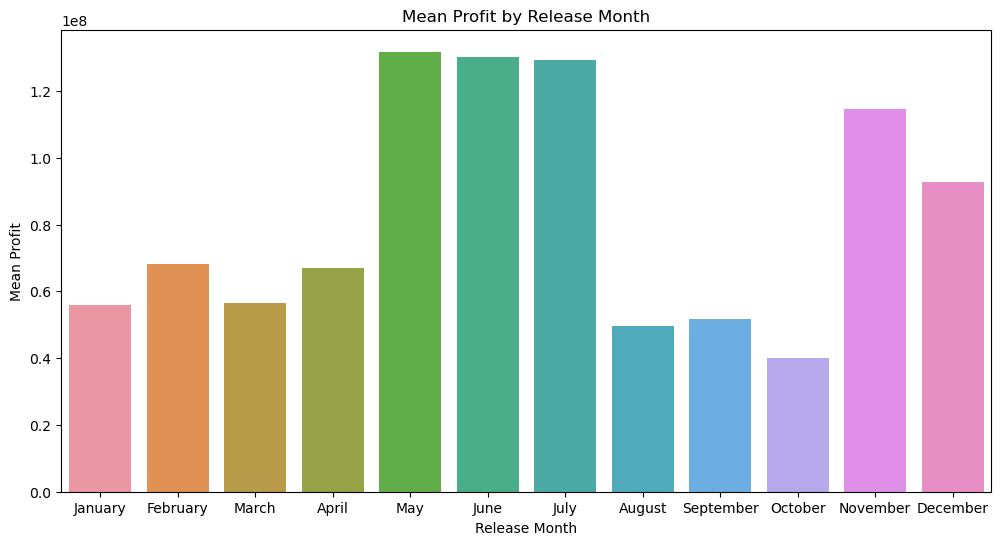

In [87]:
# Extract the release month from the release date column
cleaned_final_merged['release_month'] = pd.to_datetime(cleaned_final_merged['release_date_x']).dt.month

# Calculate mean profit for each release month
mean_profit_by_month = cleaned_final_merged.groupby('release_month')['profit'].mean().sort_values(ascending=False)

# Plot the mean profit by release month
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_profit_by_month.index, y=mean_profit_by_month.values)
plt.title('Mean Profit by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Mean Profit')
plt.xticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()


#### Optimal Release Months:

**May, June, and July**: These summer months show the highest mean profits, likely due to school vacations and the blockbuster season. Releasing high-budget, highly anticipated movies during these months can maximize profitability.

**November and December:** The holiday season is another lucrative period, with families and individuals having more leisure time to watch movies.

#### Less Profitable Months:

October, August, and September: These months show lower mean profits, possibly due to fewer holidays and the back-to-school season. 

Movies released during these months may need stronger marketing campaigns to attract audiences.

#### Strategic Release Planning:

Plan major releases during the peak profitable months (May, June, July, November, and December).
Consider counter-programming during less profitable months by targeting niche markets or releasing unique, high-quality content that stands out.

#### **4. Production Budgets Vs Profits**

Next, let's figure out how production budgets relate with the profits movies rake in.

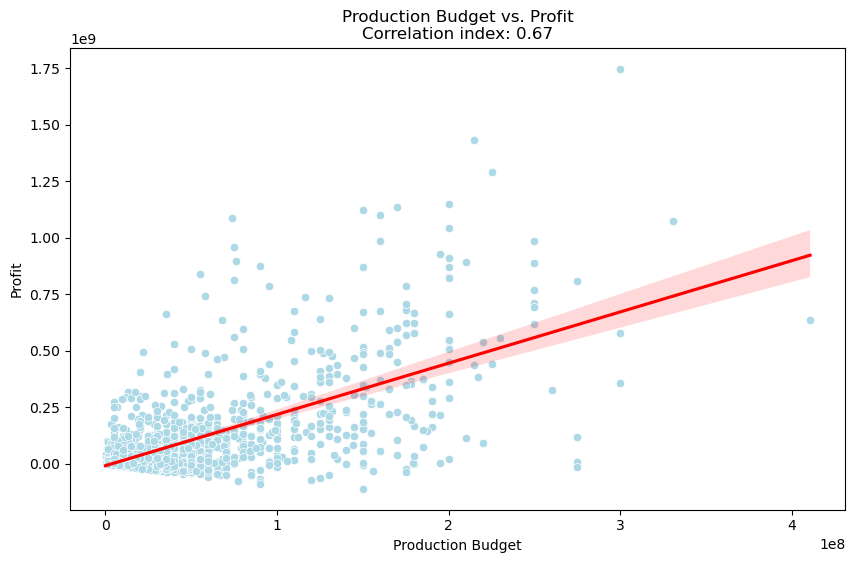

0.6745007825338489

In [99]:
# Calculate correlation between production budget and profit
correlation_budget_profit = cleaned_final_merged['production_budget'].corr(cleaned_final_merged['profit'])

# Scatter plot: Production Budget vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='profit', data=cleaned_final_merged, color='lightblue')
sns.regplot(x='production_budget', y='profit', data=cleaned_final_merged, scatter=False, color='red')
plt.title(f'Production Budget vs. Profit\nCorrelation index: {correlation_budget_profit:.2}')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.show()

correlation_budget_profit

The correlation coefficient between production budget and profit is approximately **0.675**. 

This indicates a strong positive correlation, meaning that higher production budgets are generally associated with higher profits.

While higher budgets can lead to higher profits, it is important to balance investment with potential returns. 

Not all high-budget movies guarantee high profits, as indicated by the variability in the data.

Allocate budgets strategically, considering factors such as genre, target audience, and market trends to optimize profitability.

#### **5. Optimum Budget Range for max profits**
We would now be curious to see what the optimum budget range would be to maximixe profits.

/var/folders/lq/_1mfm1_x15s4jd56sgz3z4d00000gn/T/ipykernel_41299/4194951500.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_profit_by_budget_range = cleaned_final_merged.groupby('budget_range')['profit'].mean().sort_values(ascending=False)
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


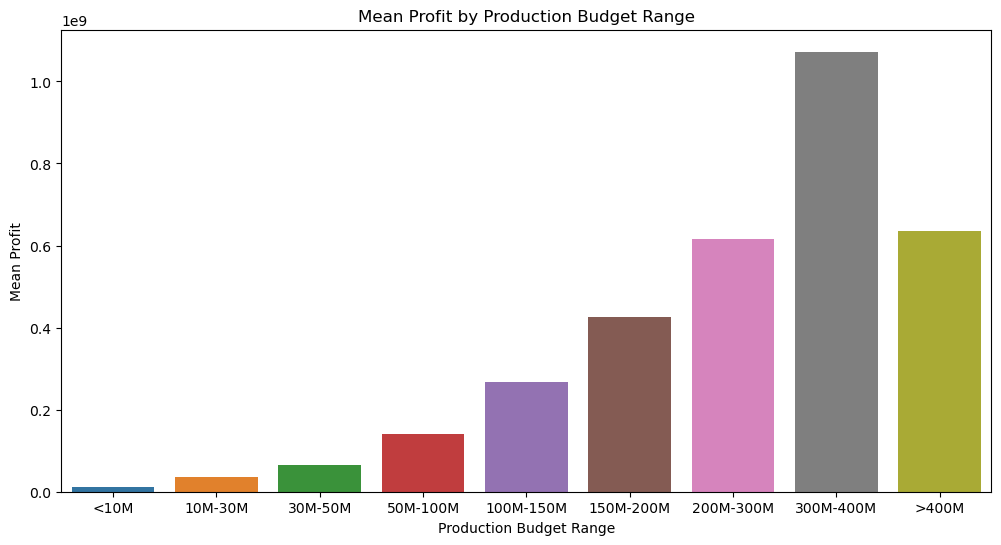

In [100]:
# Segment production budgets into ranges
budget_bins = [0, 10e6, 30e6, 50e6, 100e6, 150e6, 200e6, 300e6, 400e6, float('inf')]
budget_labels = ['<10M', '10M-30M', '30M-50M', '50M-100M', '100M-150M', '150M-200M', '200M-300M', '300M-400M', '>400M']

cleaned_final_merged['budget_range'] = pd.cut(cleaned_final_merged['production_budget'], bins=budget_bins, labels=budget_labels)

# Calculate mean profit for each budget range
mean_profit_by_budget_range = cleaned_final_merged.groupby('budget_range')['profit'].mean().sort_values(ascending=False)

# Plot the mean profit by budget range
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_profit_by_budget_range.index, y=mean_profit_by_budget_range.values)
plt.title('Mean Profit by Production Budget Range')
plt.xlabel('Production Budget Range')
plt.ylabel('Mean Profit')
plt.show()

The highest mean profits are associated with very high production budgets, particularly in the $300M-$400M range. Movies in this range tend to be major blockbusters that can generate substantial revenue.

Budgets in the $100M-$200M range also show strong profitability. These movies can balance high production values with more manageable costs compared to the top tier.

Lower budget movies (<$50M) tend to have lower mean profits. While they carry less financial risk, they generally do not generate the same level of profit as higher-budget movies.

*Optimal Budget Range*

Based on the analysis, the optimal budget range to maximize profits appears to be $300M-$400M. This range shows the highest mean profit, suggesting that investing in big-budget blockbusters can yield the greatest financial returns.

#### **6. Ratings vs Profit**
Next, lets have a look at the movie ratings. Are they really related with movie profits?

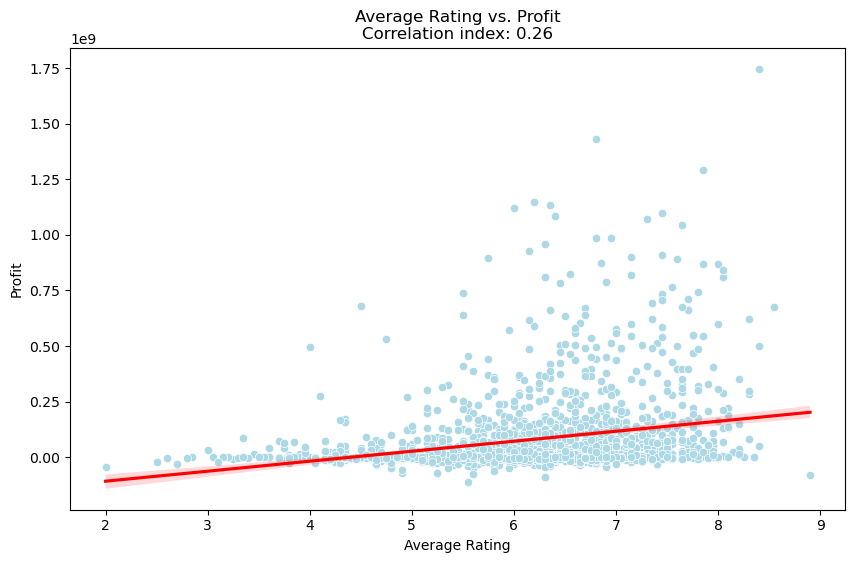

0.25712563299234087

In [102]:
# Calculate correlation between average rating and profit
correlation_rating_profit = cleaned_final_merged['average_rating'].corr(cleaned_final_merged['profit'])

# Scatter plot: Average Rating vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rating', y='profit', data=cleaned_final_merged, color='lightblue')
sns.regplot(x='average_rating', y='profit', data=cleaned_final_merged, scatter=False, color='red')
plt.title(f'Average Rating vs. Profit\nCorrelation index: {correlation_rating_profit:.2}')
plt.xlabel('Average Rating')
plt.ylabel('Profit')
plt.show()

correlation_rating_profit

The correlation coefficient between average rating and profit is approximately **0.257**. 

This indicates a weak to moderate positive correlation, meaning that higher-rated movies tend to be more profitable, but other factors also play significant roles in determining profitability.

The relatively weak correlation suggests that while ratings are important, other factors such as production budget, genre, marketing, and release timing also significantly impact profitability.

#### **7. Directors vs Profits**

We might now ask, do movie directors impact profits? 

In [103]:
# Calculate mean profit for each director
mean_profit_by_director = cleaned_final_merged.groupby('director_name')['profit'].mean().sort_values(ascending=False)

# Display top 10 directors by mean profit
top_10_directors_by_profit = mean_profit_by_director.head(10)

# Display bottom 10 directors by mean profit
bottom_10_directors_by_profit = mean_profit_by_director.tail(10)

top_10_directors_by_profit, bottom_10_directors_by_profit

(director_name
 Joss Whedon        1.182675e+09
 Adam Green         1.122470e+09
 Anthony Russo      1.060869e+09
 Kyle Balda         1.023032e+09
 Yarrow Cheney      8.117505e+08
 Jun Falkenstein    7.878545e+08
 Lee Unkrich        7.459438e+08
 Sam Mendes         7.450740e+08
 Tim Miller         7.430256e+08
 Peter Jackson      7.243160e+08
 Name: profit, dtype: float64,
 director_name
 Ash Brannon             -35851512.0
 Michael B. Clifford     -43467226.0
 Lawrence Kasanoff       -44926294.0
 Emilio Roso             -48884073.0
 Matthew Kennedy         -49318920.0
 Michael Mann            -50334996.0
 Andrey Konchalovskiy    -69533984.0
 James L. Brooks         -70371823.0
 Candy J. Beard          -79448583.0
 Simon Wells            -110450242.0
 Name: profit, dtype: float64)

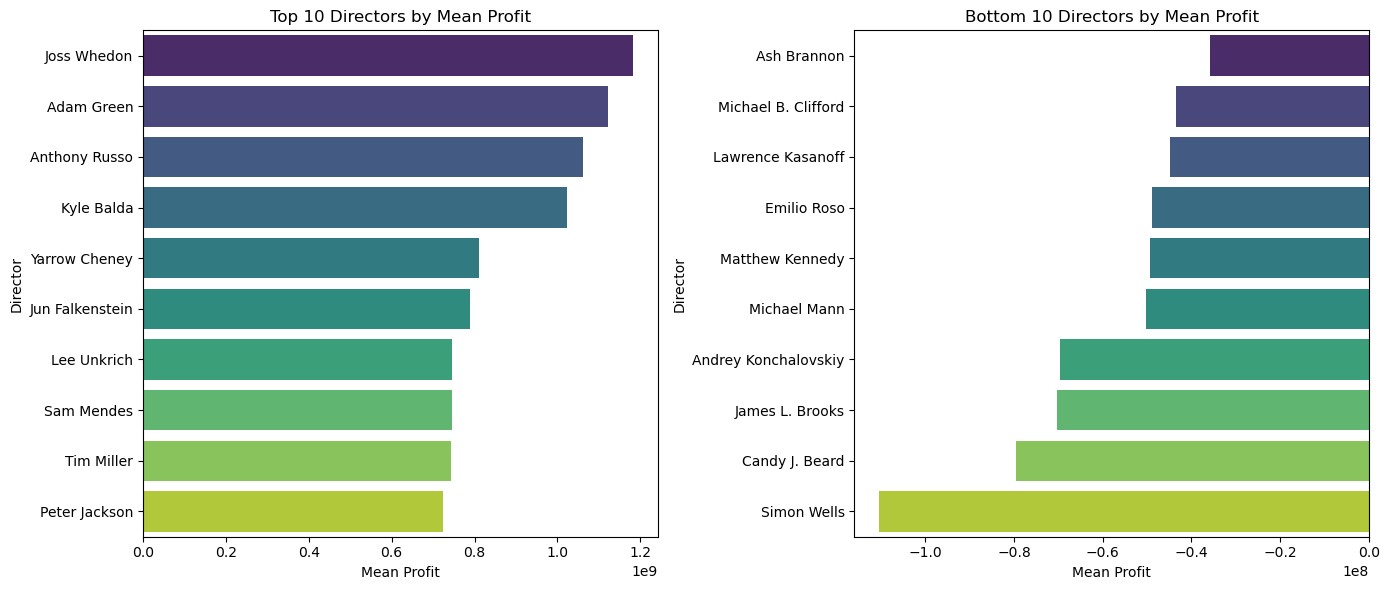

In [104]:
# Plot the mean profit by director for top 10 and bottom 10 directors
plt.figure(figsize=(14, 6))

# Top 10 Directors
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_directors_by_profit.values, y=top_10_directors_by_profit.index, palette="viridis")
plt.title('Top 10 Directors by Mean Profit')
plt.xlabel('Mean Profit')
plt.ylabel('Director')

# Bottom 10 Directors
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_10_directors_by_profit.values, y=bottom_10_directors_by_profit.index, palette="viridis")
plt.title('Bottom 10 Directors by Mean Profit')
plt.xlabel('Mean Profit')
plt.ylabel('Director')

plt.tight_layout()
plt.show()

Top Directors:

Directors like Joss Whedon, Adam Green, and Anthony Russo have high mean profits, indicating that movies directed by these individuals tend to be more profitable.

Bottom Directors:

On the other end, some directors have consistently lower profits, indicating potential challenges or less market appeal for movies directed by them.


However, while certain directors may have a reputation for profitability, the director's name alone is not a strong predictor of a movie's financial success. Other factors such as genre, budget, marketing, and cast play significant roles.

#### **8. Average Movie Profit Trends over time**
How has movie profitability changed over time?

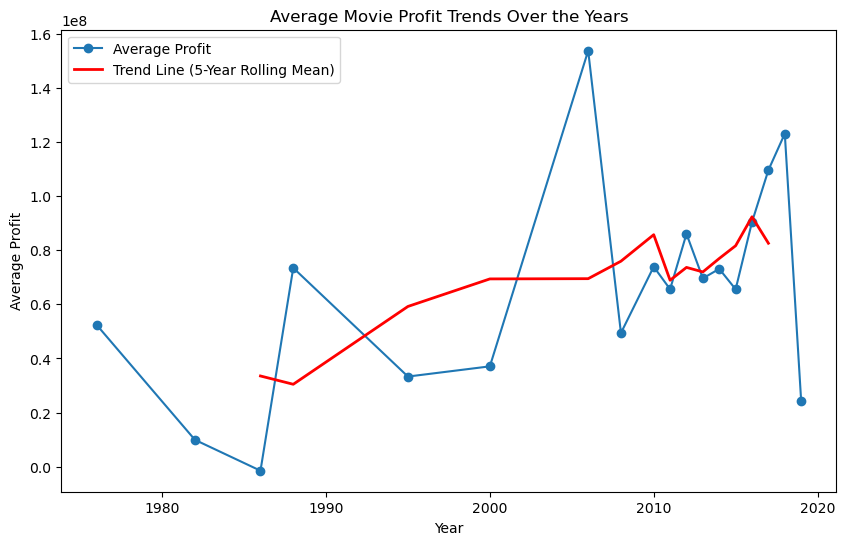

In [108]:
# Extract the year from the 'release_date_x' column
cleaned_final_merged['release_year'] = pd.to_datetime(cleaned_final_merged['release_date_x']).dt.year

# Group by year and calculate the average profit
profit_trends = cleaned_final_merged.groupby('release_year')['profit'].mean().reset_index()

# Calculate the overall trend using a rolling mean for smoothing
profit_trends['profit_trend'] = profit_trends['profit'].rolling(window=5, center=True).mean()

# Plot the profit trends along with the trend line
plt.figure(figsize=(10, 6))
plt.plot(profit_trends['release_year'], profit_trends['profit'], marker='o', label='Average Profit')
plt.plot(profit_trends['release_year'], profit_trends['profit_trend'], color='red', linewidth=2, label='Trend Line (5-Year Rolling Mean)')

plt.title('Average Movie Profit Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.legend()
plt.show()

Fluctuations in Average Profit:

The trend chart shows notable fluctuations in average profit over the years. This indicates that the financial success of movies can vary significantly from year to year. This could be influenced by various factors such as economic conditions, competition, and changing audience preferences.

Periods of High Profitability:

Certain years may show spikes in average profit, suggesting the release of particularly successful films or trends that resonated well with audiences during those periods.

Periods of Low Profitability:

Conversely, years with lower average profits could indicate a higher prevalence of less successful films, market saturation, or external factors negatively affecting the industry.

The red trend line represents the 5-year rolling mean of average movie profits. This trend line smooths out short-term fluctuations and highlights the overall trend in movie profitability over the years.

This visualization can help identify longer-term patterns and trends, providing a clearer picture of how the industry is evolving

## Conclusions and Recommendations

### 1. Focus on High-Performing Genres:

Invest in **Animation**, **Adventure**, and **Sci-Fi** genres: These genres show the highest mean profits according to the analysis. By producing movies in these genres, Microsoft can leverage their high market appeal and profitability.

**Diversify with other profitable genres**: While focusing on top-performing genres, it is also beneficial to have a diversified portfolio that includes other genres to cater to different audience segments and reduce financial risk.

### 2. Strategic Release Timing:

Release major films in **May**, **June**, **July**, **November**, and **December**: These months have been identified as the most profitable due to holidays and blockbuster seasons. Scheduling major releases during these periods can maximize audience turnout and box office revenue.

**Consider counter-programming**: During less profitable months like October, August, and September, consider releasing unique, high-quality films that can stand out without heavy competition.

### 3. Optimal Production Budgets:

**Allocate higher budgets** ($100M-$400M) for potential blockbusters: The analysis indicates a strong positive correlation between high production budgets and profits. **Specifically, the $300M-$400M budget range** shows the highest mean profits, suggesting that well-funded blockbusters can yield significant returns.

**Balance investments in mid-range budgets** ($100M-$200M): This range also shows strong profitability while being more manageable compared to top-tier budgets. Investing in this range can provide a good balance between production value and cost control.

### 4. Leverage High-Rating Factors:

**Aim for high-quality production** to secure better ratings: Although the correlation between ratings and profits is moderate, higher-rated movies tend to be more profitable. Ensuring high production quality, compelling storytelling, and strong performances can help achieve better ratings and audience reception.

**Utilize established talent**: Working with renowned directors and actors can enhance the perceived quality and marketability of a film, contributing to better ratings and profitability.

### 5. Consider Runtime for Targeted Audiences:

**Produce longer movies for theatrical releases**: The weak to moderate positive correlation between runtime and profit suggests that slightly longer movies can be more profitable, likely due to perceived value and immersive experiences. 

However, balance is key as excessively long movies might deter some viewers.

### 6. Director and Talent Strategy:

**Collaborate with top directors**: Directors like Joss Whedon and Anthony Russo have a track record of high profits. Investing in projects led by top directors can enhance a movie's financial prospects.

### 7. Monitor Market Trends and Audience Preferences:

**Stay agile with market trends**: Regularly analyze market data and audience preferences to adapt strategies accordingly. This can involve adjusting genres, release schedules, and marketing efforts based on real-time insights.